<a href="https://colab.research.google.com/github/MatthewFried/Udemy/blob/master/Day2_Example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Cleaning and Preparatory Analysis#
Here we attack the problem as clearly outlined in the case study. We use said data and plumb the depths of expert domain experience in reasearch as well. 
I have done much research and have found that this data is so entirely corrupted it is worthless. Please join me on my adventure in proving this conclusion.
Firstly, I would like to note that regular EDA methods are taken, and at each step we explore what we should learn and what may be wrong at every level.



*   While regular analysis may often conclude that data with NANs can be imputed or erased, both of these techniques leave layers of added misinformation that change the underlying data. Although this may not be a necessity, as can be seen here, where most columns are not missing much data, a deeper cluster analysis is really called for, however that is beyond the scope of this homework
*   It is important to note that data must be consistent with real-world measures. Almost none of this data is in fact that!  There cannot be negative pH scores, certain indices must add to a whole, and while certain other indices are sometimes irrelvent, there is much to be gained from this knowlege by experts at times as well.
*   Here there are no major reasons for collineation, just as well as domain expert knowledge would imply that many of the variables are worthwhile NOT putting together because a wine taster (such as myself) is very curious about these variables even if they are not as robust as others. While someone may argue that clarity can be gained through simplicity, a wine lover would argue that throwing out variables, throws out important information as well.



In [ ]:
# load pandas and numpy libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# load the entire dataset from a file uploaded to my GitHub repo
df = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day2/Day2_Data.csv")

#create a second stored value of original data as a safety
df_orignal = df

# check the dataset uploaded as expected
print("Observations: {}".format(df.shape[0]))
df.head()

Observations: 12795


INDEX  TARGET  FixedAcidity  ...  LabelAppeal  AcidIndex  STARS
0      1       3           3.2  ...            0          8    2.0
1      2       3           4.5  ...           -1          7    3.0
2      4       5           7.1  ...           -1          8    3.0
3      5       3           5.7  ...           -1          6    1.0
4      6       4           8.0  ...            0          9    2.0

[5 rows x 16 columns]

In [ ]:
#Before beginning any analysis, we drop the first Index column as it is useless in a dataframe
df.drop('INDEX',1,inplace = True)

In [ ]:
# rename the variables in the dataset with meaningful names 
df = df.rename(columns={'TARGET':'CasesSold','STARS':'Rating'})


From a cursory look, it's very unclear how any column could have negative values. It seems unlikely that this data was normalized or standardized as well. For instance, pH cannot be negative.  The only solution I have is to turn everything positive and assume the negative signs are mistakes. While this is extreme, without any insight from the one who gathered this data, we must do so across the values and be consistent.

In [ ]:
#Count how many are negative to check if it was pre-standardized
#We see that is highly unlikely
a = df.loc[df.CitricAcid <= 0, 'CitricAcid'].count()
b= df.loc[df.Chlorides < 0, 'Chlorides'].count()
c = df.loc[df.FreeSulfurDioxide < 0, 'FreeSulfurDioxide'].count()
print(a, "\t" , b, "\t", c)

3081 	 3197 	 3036


In [ ]:
#Turn all values positive
df = abs(df)

In [ ]:
#check to see if there are duplicates
x = sum(df.duplicated())
print(x)

0


In [ ]:
#check how many values are null
df.isnull().sum()

CasesSold                0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
Rating                3359
dtype: int64

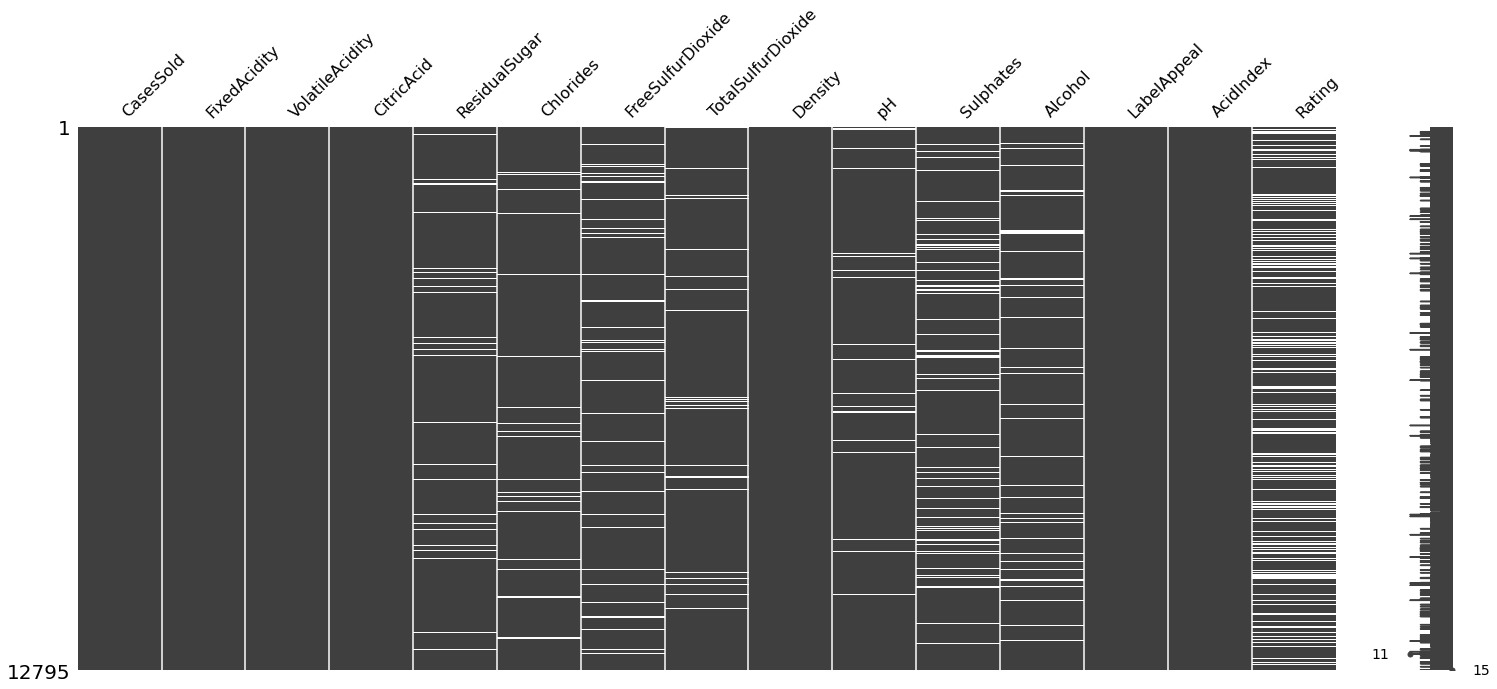

In [ ]:
#See a matrix of all the missing data
ax = msno.matrix(df)

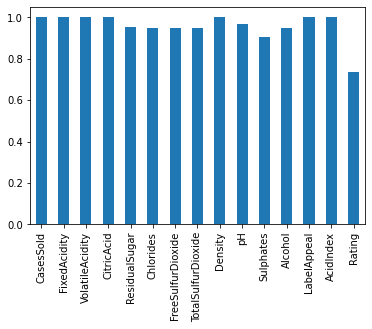

In [ ]:
#See a plot of all the missing data
fig, ax = plt.subplots(figsize=(6, 4))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax)

In [ ]:
# show dataset summary statistics
df.describe()

CasesSold  FixedAcidity  ...     AcidIndex       Rating
count  12795.000000  12795.000000  ...  12795.000000  9436.000000
mean       3.029074      8.063251  ...      7.772724     2.041755
std        1.926368      4.996119  ...      1.323926     0.902540
min        0.000000      0.000000  ...      4.000000     1.000000
25%        2.000000      5.600000  ...      7.000000     1.000000
50%        3.000000      7.000000  ...      8.000000     2.000000
75%        4.000000      9.800000  ...      8.000000     3.000000
max        8.000000     34.400000  ...     17.000000     4.000000

[8 rows x 15 columns]

In general dry red wines should have an IA range of about 2 to 3, dry white wines about 2.7 to 3.7 and off-dry white wines about 3.8 to 4.8. The fact that we have an Index of Acidity that has a mean of 7 is extremely strange, unless of course we have many ice-wines which have an acidity level close to 12. Also, the standard deviation is low enough that it would seem to corroborate something very wrong with our AcidIndex column. Since I have no way of determining what is wrong here, I will have to drop the column entirely. 
Besides this, something most be wrong as FixedAcidity is usually measured quite differently and should not have an average of 8. And, furthermore, FixedAcidity + VolatileAcidity should equal the AcidityIndex, which it does not. 
While I cannot confirm this is the case (and since I am not a domain expert in the chemical composition of wine), I think dropping this category is best.

In [ ]:
df.drop('AcidIndex',1,inplace = True)

A questionable data point that comes out of the above analysis is whether or not LabelAppeal could be 0. It seems unlikely that one would create a scale from 0 to 2 and actually have wines that have zero appeal.  And it seems especially unlikely that you have close to half the wines with absolutely no appeal. (See below)
However, since it is possible, yet not probable, we will leave this data in, but treat it with discriminatory abandon.
It seems just as unlikely that if we had kept the -1 instead of getting the absolute value that we would have a scale from -1 to 2.  So, we must consult the person that create this data and see what is going on.

In [ ]:
#number of times LabelAppeal is 0
df.loc[df.LabelAppeal == 0, 'LabelAppeal'].count()

5617

The Wine Spectator magazine says: Winemakers use pH as a way to measure ripeness in relation to acidity. Low pH wines will taste tart and crisp, while higher pH wines are more susceptible to bacterial growth. Most wine pH's fall around 3 or 4; about 3.0 to 3.4 is desirable for white wines, while about 3.3 to 3.6 is best for reds [see here](https://www.winespectator.com/articles/what-do-ph-and-ta-numbers-mean-to-a-wine-5035#:~:text=Winemakers%20use%20pH%20as%20a,3.6%20is%20best%20for%20reds). 
 
As such, it seems quite strange to have the 75% quartile to be at 3.7 with a .67 std.  That means that 25% of our wine is far above normal levels

In [ ]:
# view correlation matrix for the variables in the dataset
corrMatrix = df.corr()
corrMatrix

CasesSold  FixedAcidity  ...  LabelAppeal    Rating
CasesSold            1.000000     -0.052984  ...    -0.004544  0.558794
FixedAcidity        -0.052984      1.000000  ...     0.003242 -0.018505
VolatileAcidity     -0.070195      0.010195  ...     0.003878 -0.030154
CitricAcid           0.013953     -0.004378  ...     0.005860  0.001627
ResidualSugar        0.003645      0.005040  ...    -0.009690  0.009897
Chlorides           -0.028463      0.002232  ...    -0.005049  0.002516
FreeSulfurDioxide    0.024503     -0.003158  ...     0.000469  0.002465
TotalSulfurDioxide   0.035253     -0.012379  ...     0.007771 -0.001291
Density             -0.035518     -0.000057  ...     0.012243 -0.018284
pH                  -0.009445     -0.002324  ...     0.001101 -0.000488
Sulphates           -0.035259      0.020987  ...     0.004947 -0.001227
Alcohol              0.063394     -0.009406  ...     0.003627  0.065273
LabelAppeal         -0.004544      0.003242  ...     1.000000  0.032235
Rating               0.558794     -0.018505  ...     0.032235  1.000000

[14 rows x 14 columns]

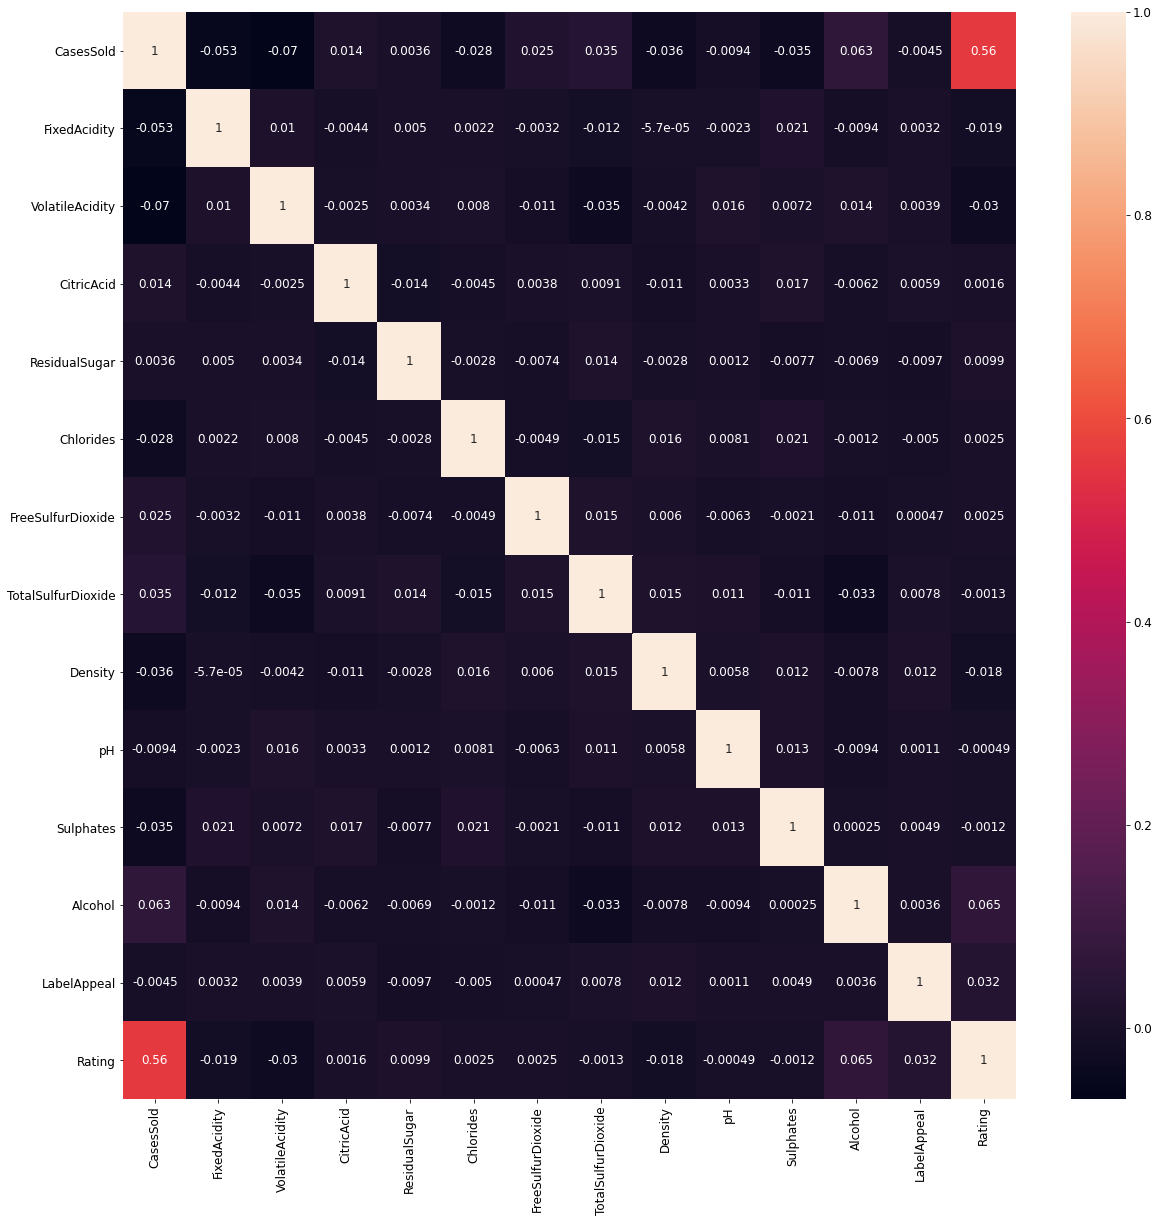

In [ ]:
# show visual representation of the correlation matrix
plt.rcParams.update({'font.size': 12,'figure.figsize':(20,20)})
f3 = sns.heatmap(corrMatrix, annot=True)
plt.show() # show plot

##**Not The Kitchen Sink**##
While it is not advisable to do every known plot out there, there is in fact a large amount of data and we need to get a handle on what it represents. 
There are several imortant reasons for showing the below. Firstly, we notice the distribution of the data. Secondly, we note that there are not significant outliers that we should take out of our data. In other words, some of these outliers may be geniune such as a very sweet wine, as noted elsewhere; and, if this is indeed a problem over all, it is not an outlier problem.
We also see there isn't much reason to run an OLS model here as our data does not look homoskedastic.

<Figure size 1440x1440 with 0 Axes>

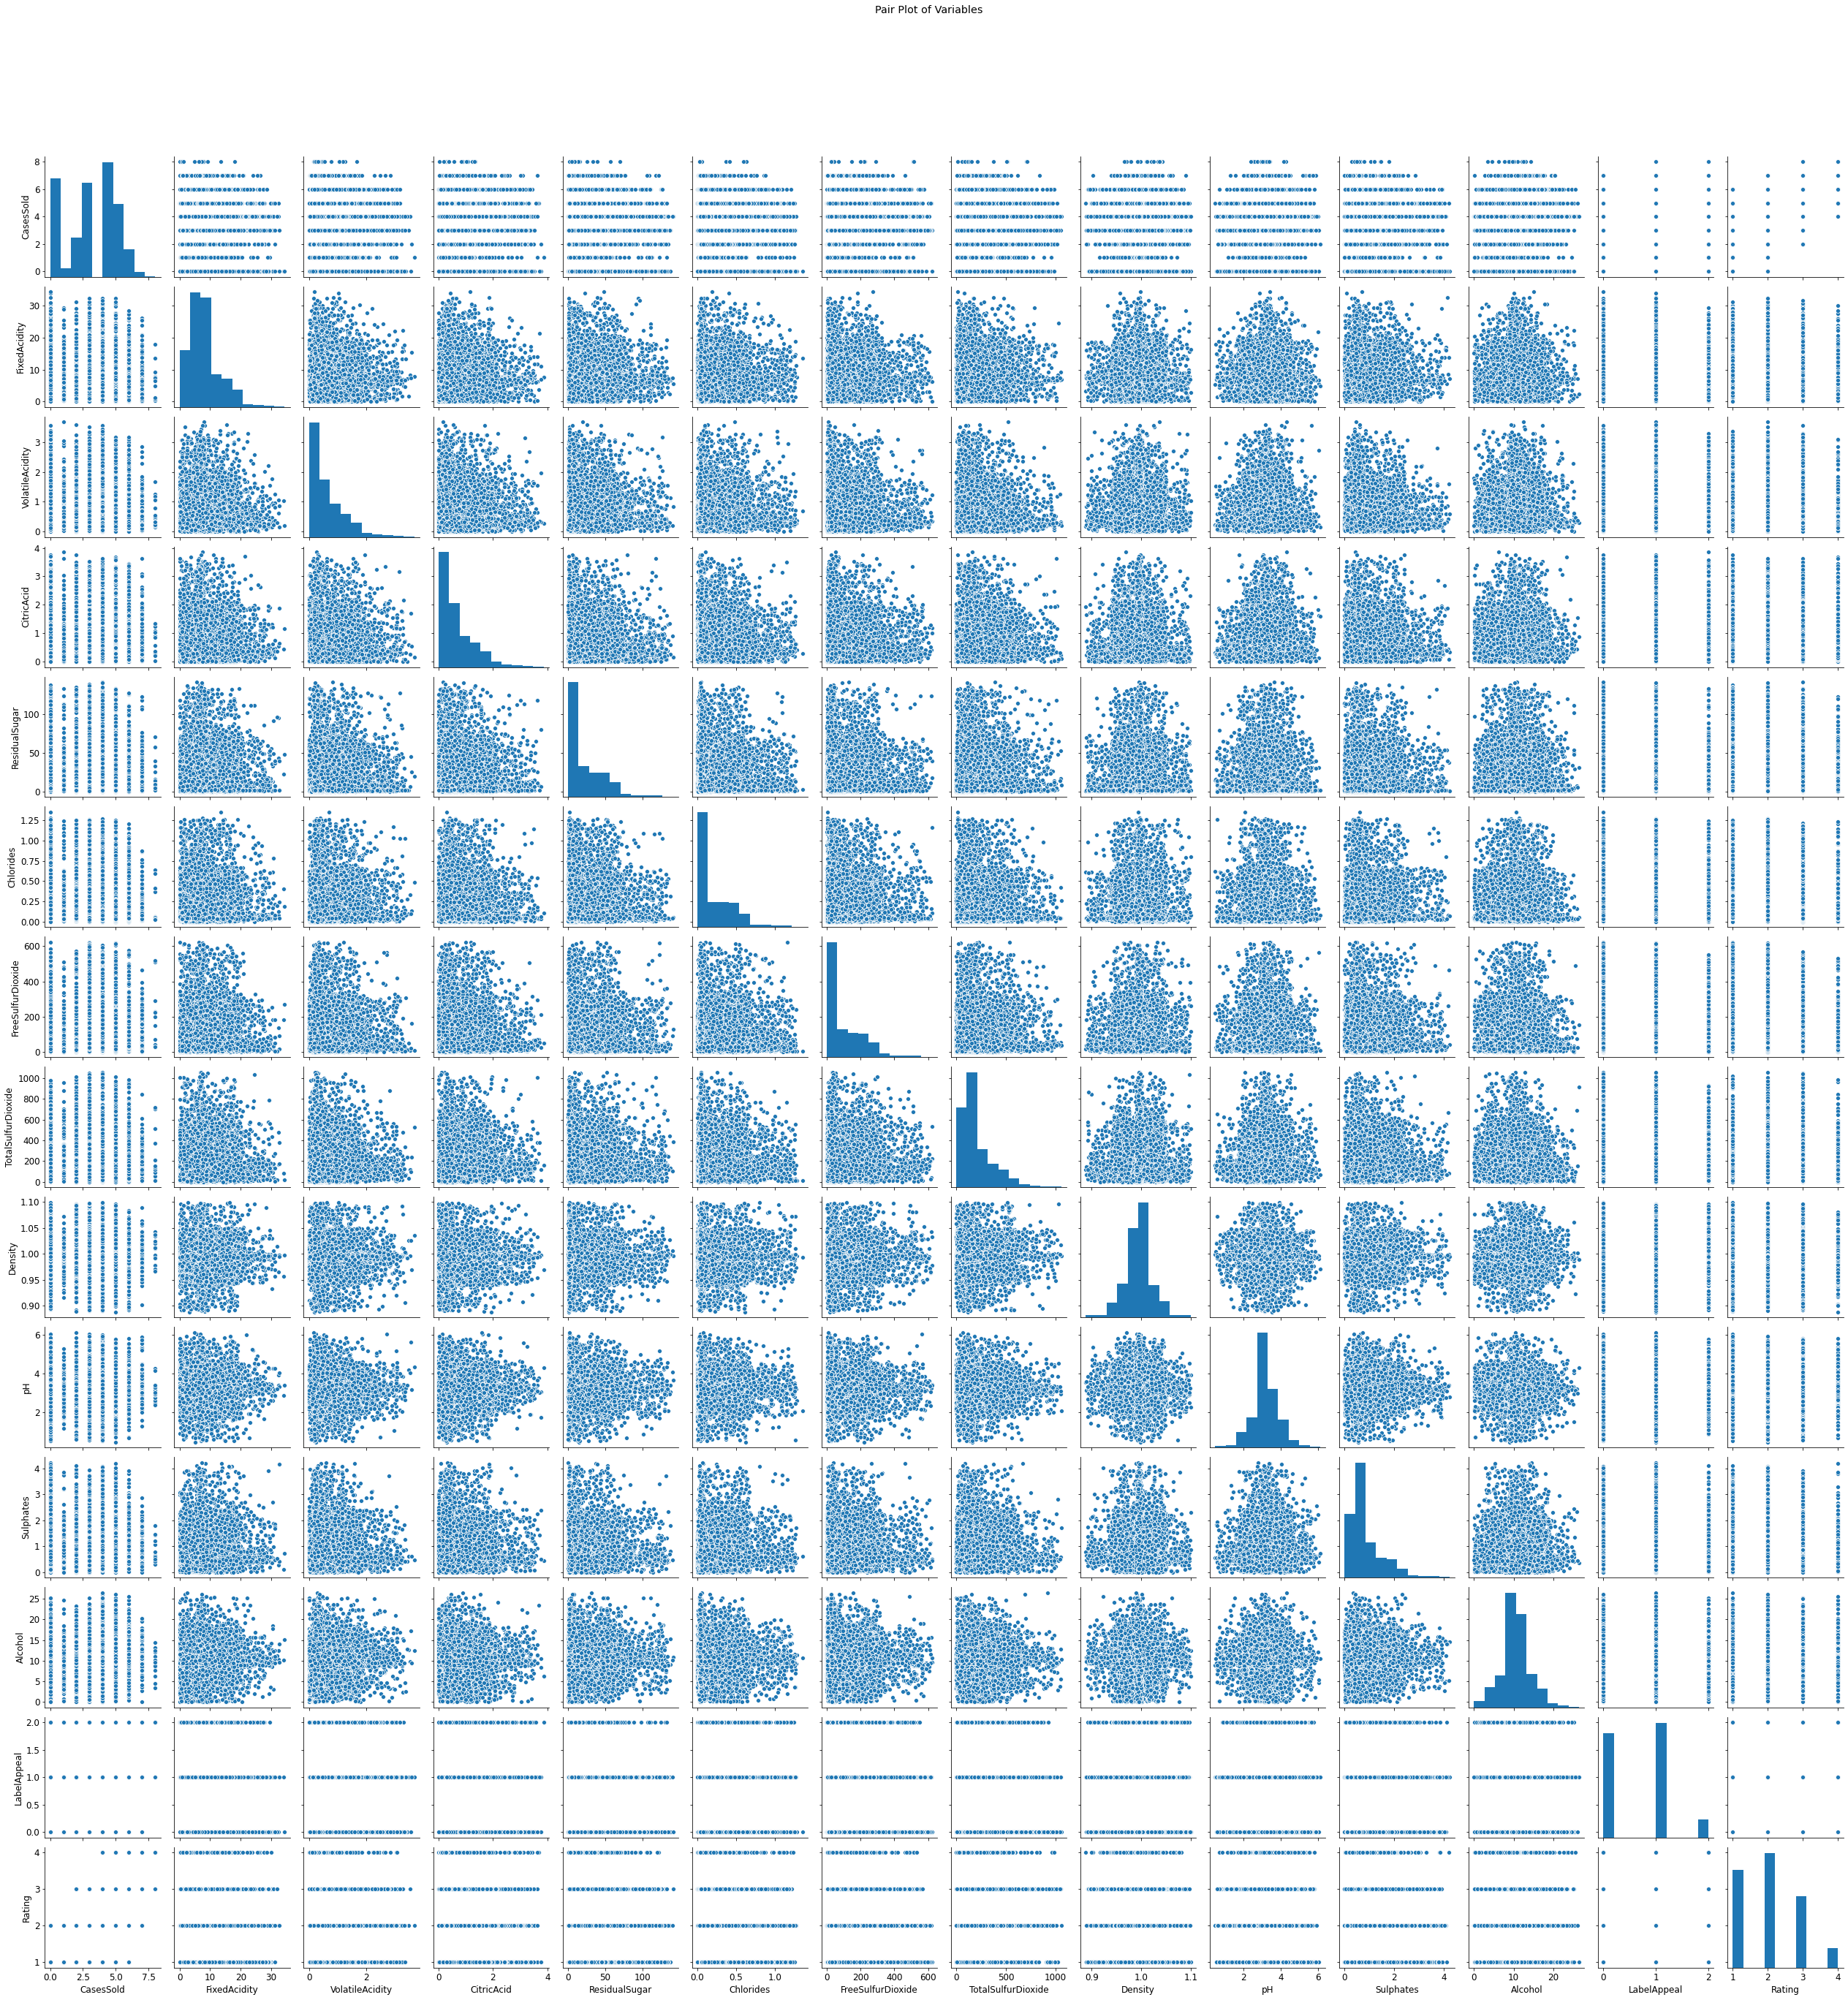

In [ ]:
# Create a pairplot to spot any abnormalities we should be aware of in the scatterplot
fig2 = plt.figure() #define the figure
g = sns.pairplot(df) #define what plot to use and what data to look at
g.fig.suptitle("Pair Plot of Variables", y=1.08) # set the title with y= some height>1 so it appears on top
plt.show() #display results

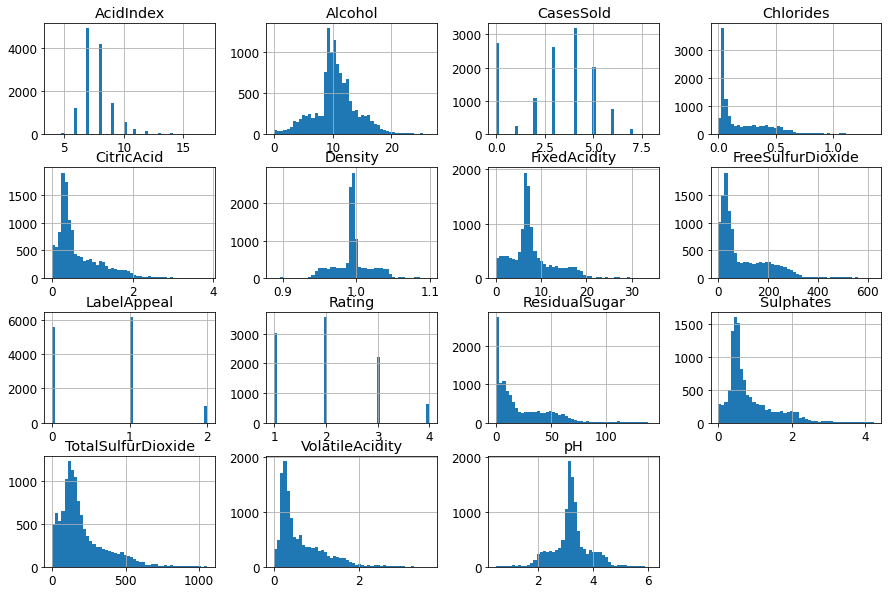

In [ ]:
#histograms
df.hist(bins=50, figsize=(15,10))
plt.show()

##**The Dreaded Dendrogram**##
We notice something fascinating from this dendrogram. It seems that the last *several* categories are all *handily* contained in the same group. This would suggest to us that we could analyze this data by grouping it thus, *however* one may note that CasesSold is in there as well and that is supposed to be our response variable!

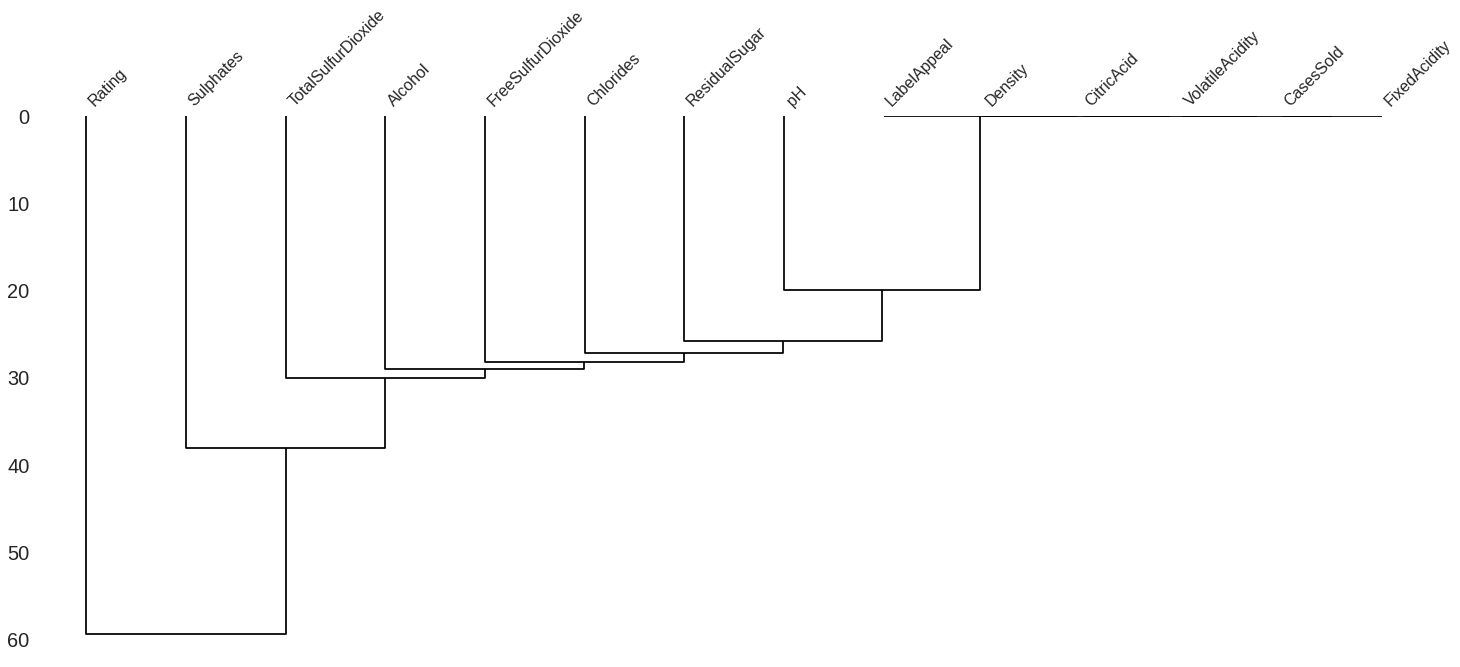

In [ ]:
msno.dendrogram(df)

###**Crosstab**###
We use a crosstab here to consider the results of the most correlated data. The reason we choose this is because LabelAppeal is a subjective marketing score and is easier to frame using the below break up than other artificial means. That is, it is effectively the same as binning and is easier to do.
We do see some surprising results:


*   Cases sold is not consistently the highest for the greatest LabelAppeal
*   The average cases sold corresponds more to a LabelAppeal of 0 or 1



In [ ]:
#use pandas crosstab to idenity data about the most correlated features
pd.crosstab(df.CasesSold,df.LabelAppeal)

LabelAppeal   0.0   1.0  2.0
CasesSold                   
0.0          1193  1331  210
1.0            19    89  136
2.0           152   762  177
3.0          1347  1188   76
4.0          1972  1178   27
5.0           775  1128  111
6.0           155   427  183
7.0             4    79   59
8.0             0     2   15

##**Setting up Our Conversions**##
Here we will be setting up all the steps necessary to test different variations of the data via normalizations, standardizations, getting rid of an imputing means for Nans, etc.

In [ ]:
#Normalized data
CasesSold = df['CasesSold']
n_df=(df-df.mean())/df.std()
n_df.drop('CasesSold',1,inplace = True)
n_df.head()

FixedAcidity  VolatileAcidity  CitricAcid  ...   Alcohol  LabelAppeal    Rating
0     -0.973406         0.933947    0.484625  ... -0.171880    -1.027778 -0.046264
1     -0.713204        -0.865863    0.204099  ...       NaN     0.581426  1.061720
2     -0.192800         3.597667    0.319610  ...  3.162231     0.581426  1.061720
3     -0.473017        -0.460905   -1.066517  ... -1.191401     0.581426 -1.154248
4     -0.012660        -0.559895    0.946667  ...  0.875196    -1.027778 -0.046264

[5 rows x 13 columns]

In [ ]:
#Min-max normalization
mm_df=(df-df.min())/(df.max()-df.min())
mm_df.drop('CasesSold',1,inplace = True)
mm_df.head()

FixedAcidity  VolatileAcidity  CitricAcid  ...   Alcohol  LabelAppeal    Rating
0      0.093023         0.315217    0.253886  ...  0.373585          0.0  0.333333
1      0.130814         0.043478    0.209845  ...       NaN          0.5  0.666667
2      0.206395         0.717391    0.227979  ...  0.830189          0.5  0.666667
3      0.165698         0.104620    0.010363  ...  0.233962          0.5  0.000000
4      0.232558         0.089674    0.326425  ...  0.516981          0.0  0.333333

[5 rows x 13 columns]

In [ ]:
#drop all missing values
dropNA_df = df.dropna()
dropNAN_df = n_df.dropna()
dropNAMM_df = mm_df.dropna()
dropNA_df.head()

CasesSold  FixedAcidity  VolatileAcidity  ...  Alcohol  LabelAppeal  Rating
2         5.0           7.1            2.640  ...     22.0          1.0     3.0
3         3.0           5.7            0.385  ...      6.2          1.0     1.0
9         6.0           5.5            0.220  ...     12.6          0.0     4.0
10        0.0          17.2            0.520  ...     13.1          1.0     1.0
12        3.0           6.0            0.330  ...      3.9          1.0     2.0

[5 rows x 14 columns]

##**Data Transformation and Imputing**##
None of the data is so connected that we would create collinear columns with feature engineering, however some of it may do well to binning or other transformations tried below.
One possbility is to try the RFECV Random Forest Classifier to breakdown the features, however, firstly, this can at times get rid of our target feature, which would make this unreliable, and secondly, I cannot find much information about this. Since I don't understand it, I don't think I should use it.
Below we impute the data with the mean and then check the histrogram and note nothing has changed. We check other statistics as well and find, as we know, imputing with the mean is not a good idea as it is another layer of transformations if it clears up some of the problems.

In [ ]:
#We impute the data with the mean
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(
    include="number"
).columns
im = SimpleImputer()  # mean
imputed = im.fit_transform(df[num_cols])
imputed = pd.DataFrame(imputed)
imputed.head()

0    1      2     3     4   ...    9     10         11   12   13
0  3.0  3.2  1.160  0.98  54.2  ...  3.33  0.59   9.900000  0.0  2.0
1  3.0  4.5  0.160  0.81  26.1  ...  3.38  0.70  10.523778  1.0  3.0
2  5.0  7.1  2.640  0.88  14.8  ...  3.12  0.48  22.000000  1.0  3.0
3  3.0  5.7  0.385  0.04  18.8  ...  2.24  1.83   6.200000  1.0  1.0
4  4.0  8.0  0.330  1.26   9.4  ...  3.12  1.77  13.700000  0.0  2.0

[5 rows x 14 columns]

##**The Test**##
If we got something better, than it should show in our histrograms, at the least!

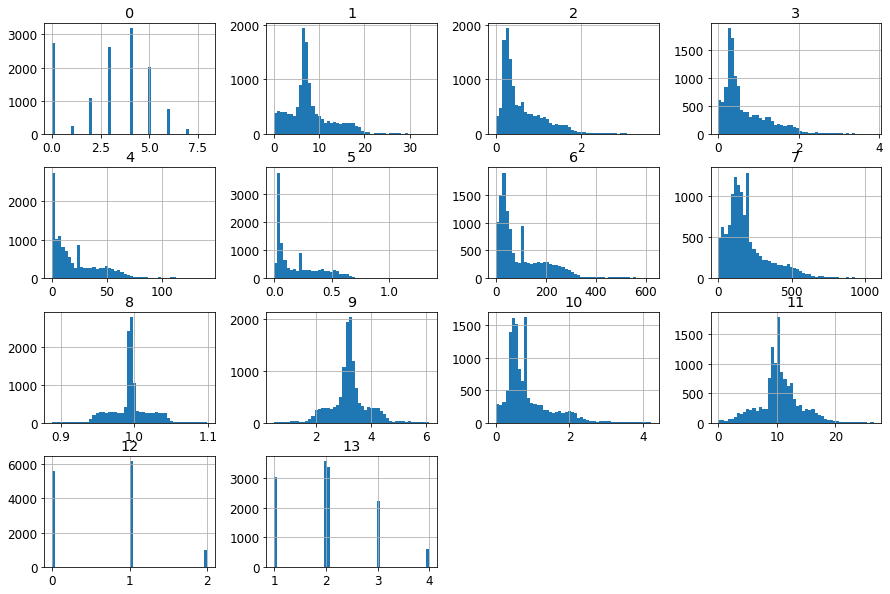

In [ ]:
#histograms
imputed.hist(bins=50, figsize=(15,10))
plt.show()

In [ ]:
imputed.describe()

0             1   ...            12            13
count  12795.000000  12795.000000  ...  12795.000000  12795.000000
mean       3.029074      8.063251  ...      0.638687      2.041755
std        1.926368      4.996119  ...      0.621425      0.775058
min        0.000000      0.000000  ...      0.000000      1.000000
25%        2.000000      5.600000  ...      0.000000      2.000000
50%        3.000000      7.000000  ...      1.000000      2.000000
75%        4.000000      9.800000  ...      1.000000      2.041755
max        8.000000     34.400000  ...      2.000000      4.000000

[8 rows x 14 columns]

#**Summary**#
In summary, we have transformed our data in many different way, however, there isn't much of a point to using the data even with the transformations. The reason is that our data is so terrible that either we need to speak with the one who catalogued it and find out the secrets that we are clearly missing or we need to change the data so drastically that we have put several layers of misinterpretation between ourselves and the analysis. 
The myriad problems listed above are not solved by any of the procedures we did. Furthermore, doing something like Box-Cox or anything else will not get rid of all the problems mentioned.
Also, creating new features or binning or any of the other regular techniques are irrelevent when there is no rhyme or reason to the erorrs.
In short, this data set is nonesense.

## ***Comments***

1. Develop some citable domain knowledge as part of the EDA 

2. Third party sourcing / verification is needed to determine data ranges, etc.

3. LabelAppeal is a "Subjective marketing score that indicates the appeal of the design of the label on the bottle". This description indicates that LabelAppeal is likely to be a categorical variable. Therefore, it would be somewhat reasonable to conclude that the indicated data values are reflective of an ordinal categorical scale, wherein -2 is likely to be the least favorable rating while 2 is likely to be the most favorable rating. 

4. Regarding the negative data values: Why do we have negative data? What is the magnitude of it? 

5. Regression modeling does not require "strong correlations" to yield useful predictive models. In fact, many predictive models having what appear to be relatively "low" correlations between explanatory variables or low R^2 values can still have useful predictive value in many contexts. Construct prospective imputative regression models and check to see whether any of the variables included prove to be statistically significant.

6. When performing imputation our goal should always be to try to maintain the probability density function (PDF) of the KNOWN data. A statistically significant regression model is usually more likely to minimize the impact of imputation on a PDF than is use of a mean or median value, even if the regression model appears to be lacking in its precision. The imputed values resulting from such a model are still relatively less likely to introduce bias than would the use of a mean or median value while allowing us to retain the affected observations for use within models. 

7. Explain your narrative 